In [12]:
from matplotlib import pyplot as plt
import numpy as np
from poisson_numcodecs import Poisson, calibrate
import zarr

### Load example data and estimate `zero_level` and `photon_sensitivity` 

In [13]:
data = np.load('../tests/data/data1.npz')['data']

In [14]:
# for bright images use count_weight_gamma=1
# for photon-starved images with few cells use count_weight_gamma = 0.001
# Otherwise, use the default
calibrator = calibrate.RasterCalibratePhotons(data)
[photon_sensitivity, dark_signal] = calibrator.get_photon_sensitivity_parameters()  

Fitting a single line, a single attempt will be made, since this is a convex problem.
Attempt 1 - Error: 368943458.02551514
Found lines: [[   148.50911317 -23312.5673727 ]]


In [15]:
[photon_sensitivity, dark_signal]

[array([148.50911317]), array([156.97735226])]

The slope and x-intercept for the photon transfer curve yield the photon sensitivity and the zero level.

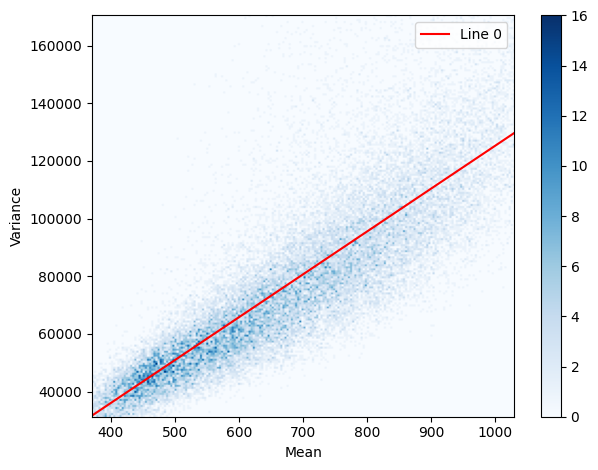

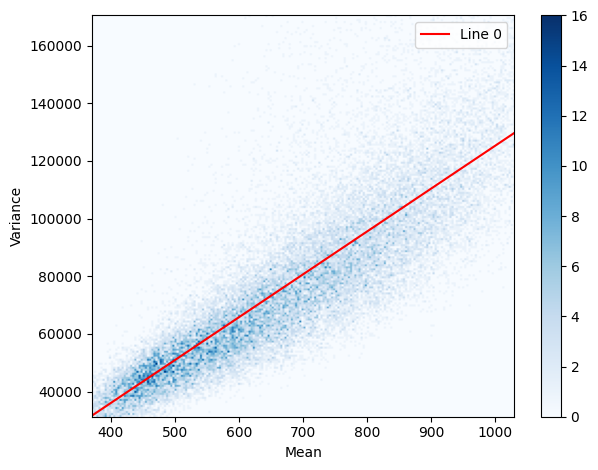

In [16]:
calibrator.plot_poisson_curve()

### Illustrate image compression using numcodecs / zarr

In [17]:
# instantiate Poisson object
poisson_filter = Poisson(photon_sensitivity=photon_sensitivity[0], dark_signal=dark_signal[0], use_lookup=False)

In [18]:

chunk_shape = (1, data.shape[1], data.shape[2])
zarr_array = zarr.open('zarr_array.zarr', chunks=chunk_shape, shape=data.shape, dtype=data.dtype, filters=[poisson_filter])
zarr_array[...] = data

In [19]:
zarr_array.info

Type,zarr.core.Array
Data type,int16
Shape,"(300, 200, 200)"
Chunk shape,"(1, 200, 200)"
Order,C
Read-only,False
Filter [0],"Poisson(beta=0.5, dark_signal=156.9773522620256, decoded_dtype='int16', encoded_dtype='uint8', photon_sensitivity=148.5091131731568, use_lookup=False)"
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,24000000 (22.9M)
No. bytes stored,9884688 (9.4M)


# RESTART THE KERNEL
Restart the kernel manually to test zarr loading

In [20]:
import matplotlib.pyplot as plt
import zarr
from poisson_numcodecs import Poisson

# you don't need to import poisson_numcodecs but it must be installed

In [21]:
# open zarr
z_reopened = zarr.open('zarr_array.zarr', mode='r')
z_reopened.info

Type,zarr.core.Array
Data type,int16
Shape,"(300, 200, 200)"
Chunk shape,"(1, 200, 200)"
Order,C
Read-only,True
Filter [0],"Poisson(beta=0.5, dark_signal=156.9773522620256, decoded_dtype='int16', encoded_dtype='uint8', photon_sensitivity=148.5091131731568, use_lookup=False)"
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,24000000 (22.9M)
No. bytes stored,9884688 (9.4M)


(-0.5, 199.5, 199.5, -0.5)

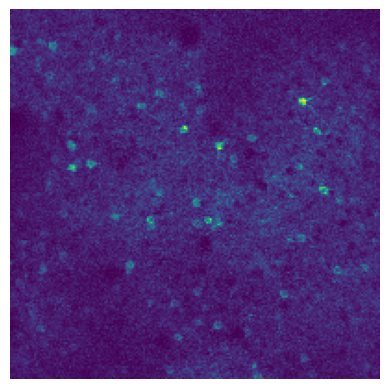

In [22]:
# show a decompressed frame
plt.imshow(z_reopened[10,:,:])
plt.axis(False)